1. Prepare Data

In [1]:
import pandas as pd
train_df = pd.read_excel("train.xlsx")
test_df = pd.read_excel("test.xlsx")

In [2]:
# train_df the training data for the model
train_df

,PlayerID,Survived,MedicalKit,Chocolate,Flashlight,Lighter,Cash,RustedSword,Pistol,Ammo,Knife,BaseballBat
0,1,1,1,1,1,1,0,0,0,0,1,0
1,2,1,1,1,0,1,0,1,0,0,0,1
2,3,1,1,1,1,0,0,1,0,0,1,0
3,4,1,0,1,0,1,1,0,1,1,0,0
4,5,1,1,1,0,0,0,0,1,1,0,1
5,6,1,0,1,0,0,0,1,1,1,0,1
6,7,0,1,0,0,1,1,1,0,1,0,0
7,8,0,1,0,1,0,1,1,1,0,0,0
8,9,0,0,0,1,0,1,1,1,0,0,1
9,10,0,1,0,1,1,0,0,1,0,1,0


In [3]:
#test_df the test data to predict if Survived
test_df

,PlayerID,MedicalKit,Chocolate,Flashlight,Lighter,Cash,RustedSword,Pistol,Ammo,Knife,BaseballBat
0,1,1,1,1,1,0,0,0,0,0,1
1,2,1,0,1,0,0,1,1,1,0,0
2,3,0,0,1,1,1,1,0,0,1,0
3,4,0,0,0,1,1,1,0,1,0,1
4,5,1,0,1,0,0,0,0,1,1,1
5,6,0,0,1,1,1,1,1,0,0,0


In [4]:
# show dataframe size (row, col)
print(train_df.shape)
print(test_df.shape)

(10, 12)
(6, 11)


2. Data Analysis

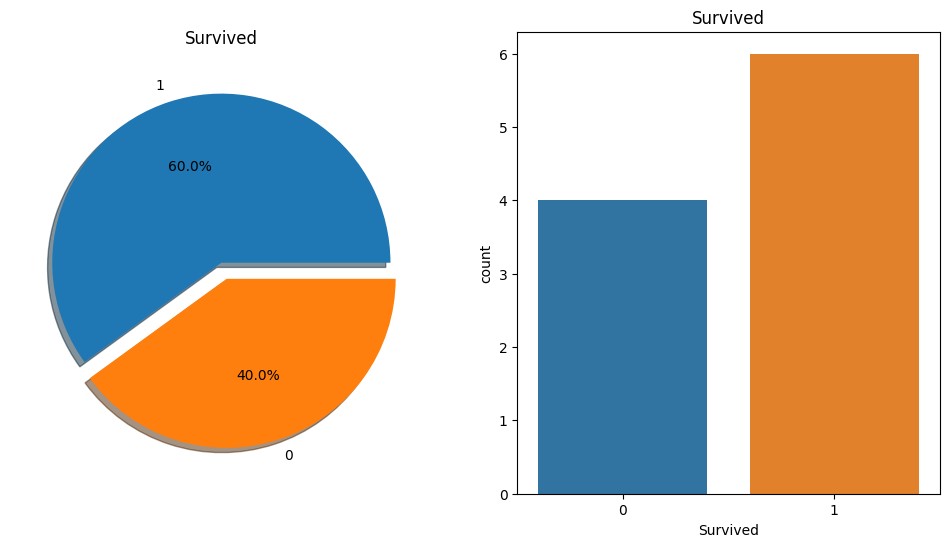

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#Survived rate

#Pie Chart
f,ax=plt.subplots(1,2,figsize=(12,6))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#Bar chart - count
sns.countplot(train_df,x='Survived', ax=ax[1])
ax[1].set_title('Survived')

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))

plt.show()

3. Training and Testing Data

In [6]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((10, 11), (10,), (6, 11))

In [7]:
# training dataset
X_train

,PlayerID,MedicalKit,Chocolate,Flashlight,Lighter,Cash,RustedSword,Pistol,Ammo,Knife,BaseballBat
0,1,1,1,1,1,0,0,0,0,1,0
1,2,1,1,0,1,0,1,0,0,0,1
2,3,1,1,1,0,0,1,0,0,1,0
3,4,0,1,0,1,1,0,1,1,0,0
4,5,1,1,0,0,0,0,1,1,0,1
5,6,0,1,0,0,0,1,1,1,0,1
6,7,1,0,0,1,1,1,0,1,0,0
7,8,1,0,1,0,1,1,1,0,0,0
8,9,0,0,1,0,1,1,1,0,0,1
9,10,1,0,1,1,0,0,1,0,1,0


In [8]:
# training dataset survived
Y_train

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    0
9    0
Name: Survived, dtype: int64

In [9]:
# test dataset
X_test

,PlayerID,MedicalKit,Chocolate,Flashlight,Lighter,Cash,RustedSword,Pistol,Ammo,Knife,BaseballBat
0,1,1,1,1,1,0,0,0,0,0,1
1,2,1,0,1,0,0,1,1,1,0,0
2,3,0,0,1,1,1,1,0,0,1,0
3,4,0,0,0,1,1,1,0,1,0,1
4,5,1,0,1,0,0,0,0,1,1,1
5,6,0,0,1,1,1,1,1,0,0,0


4. Modeling

In [10]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [11]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

100.0

In [12]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

100.0

In [13]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

100.0

In [14]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

100.0

In [15]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\Jiv Dela Cruz\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


100.0

In [16]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

100.0

In [17]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [18]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

Model Selection

In [19]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.0
1,KNN,100.0
2,Logistic Regression,100.0
3,Random Forest,100.0
4,Naive Bayes,100.0
5,Perceptron,100.0
6,Stochastic Gradient Decent,100.0
7,Linear SVC,100.0
8,Decision Tree,100.0


5. Prediction

In [20]:
# test data survived prediction
Y_pred

array([1, 1, 0, 0, 1, 0], dtype=int64)